In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data, drop dummy column
airbnb = pd.read_csv('airbnb_clean_2.csv')
airbnb.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('display.max_rows', None)

In [2]:
airbnb.sample(5)

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
11625,52046476,Bedouin Friend camp,5.00,21,421140689,"Wadi Rum Village, Aqaba Governorate, Jordan",1029.00,Jordan,4,11,16,0,8,0,Flexible,Flexible,1451.34,False,False,False,False,True,True,True,False,False,False,False,False,False,5,6,10
8507,3185040,Airstream,4.95,19,15816542,"Tyssebotnen, Hordaland, Norway",18619.00,Norway,1,1,2,0,1,0,After 4 00 pm,12 00 pm,1732.26,False,False,False,False,True,True,True,True,False,False,False,False,False,5,6,10
11378,29870423,superior triple studio,4.86,28,7231067,"Kamari, Greece",5231.00,Greece,1,3,3,0,1,0,After 3 00 pm,Flexible,5717.48,True,True,False,False,True,False,True,True,True,False,False,True,True,4,6,10
3025,5379983,Massadou medieval tower,4.89,36,27888674,"Blesle, Auvergne, France",5329.00,France,1,3,4,0,2,0,5 00 pm - 9 00 pm,11 00 am,5824.60,True,False,False,False,True,True,True,False,False,False,False,True,True,9,6,10
12317,14558288,4Fish Waterfront Pool House,4.89,267,50546965,"Koh Lanta , Krabi, Thailand",6738.00,Thailand,3,4,6,0,3,0,1 00 pm - 10 00 pm,11 00 am,187.40,True,True,False,False,True,True,True,False,True,False,True,True,True,10,9,10


In [3]:
airbnb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_id', 'address', 'price',
       'country', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms',
       'studios', 'checkin', 'checkout', 'usd_price', 'tv', 'wifi',
       'chromecast', 'refrigerator', 'kitchen', 'view', 'parking', 'workspace',
       'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events',
       'house_rules_num', 'img_links_num', 'amenities_num'],
      dtype='object')

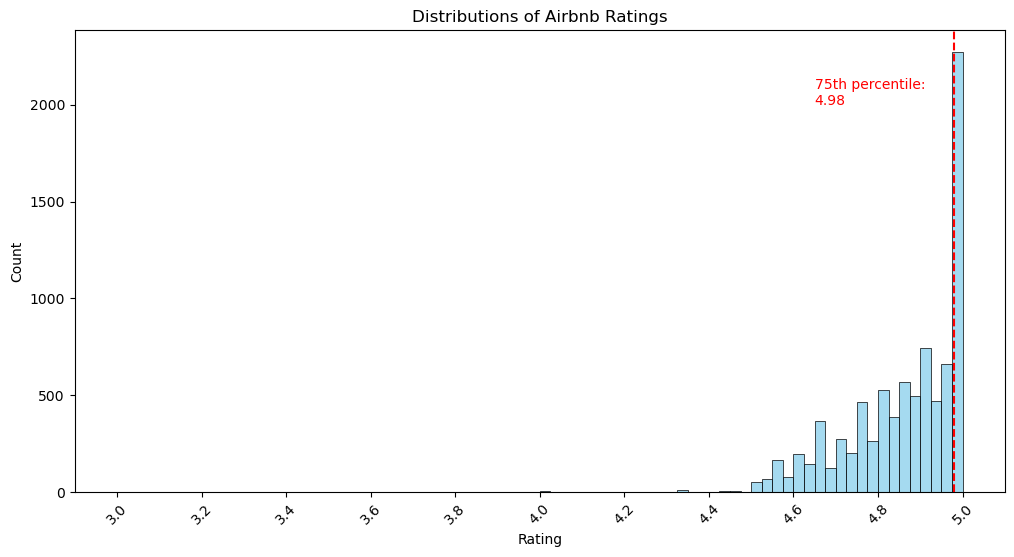

In [4]:
# Look at the distribution of ratings to decide what is considered a high rating.

# calculate the 80th percentile
airbnb_small = airbnb[airbnb['rating'] > 0].copy()
high_rating_threshold = airbnb_small['rating'].quantile(0.75)

# initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# plot histogram with the specified bins
sns.histplot(airbnb_small['rating'], bins = 80, kde = False, ax = ax, color = 'skyblue', edgecolor='black', linewidth=0.5)
ax.set_title('Distributions of Airbnb Ratings')
ax.set_ylabel('Count')
ax.set_xlabel('Rating')

# Add a line for the 80th percentile
ax.axvline(high_rating_threshold, color = 'red', linestyle = 'dashed')
ax.text(4.65, 2000,f'75th percentile:\n{high_rating_threshold:.2f}', color = 'red')

# set xticks
xticks = np.arange(3, airbnb['rating'].max()+0.2, 0.2)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# show plot
plt.show()

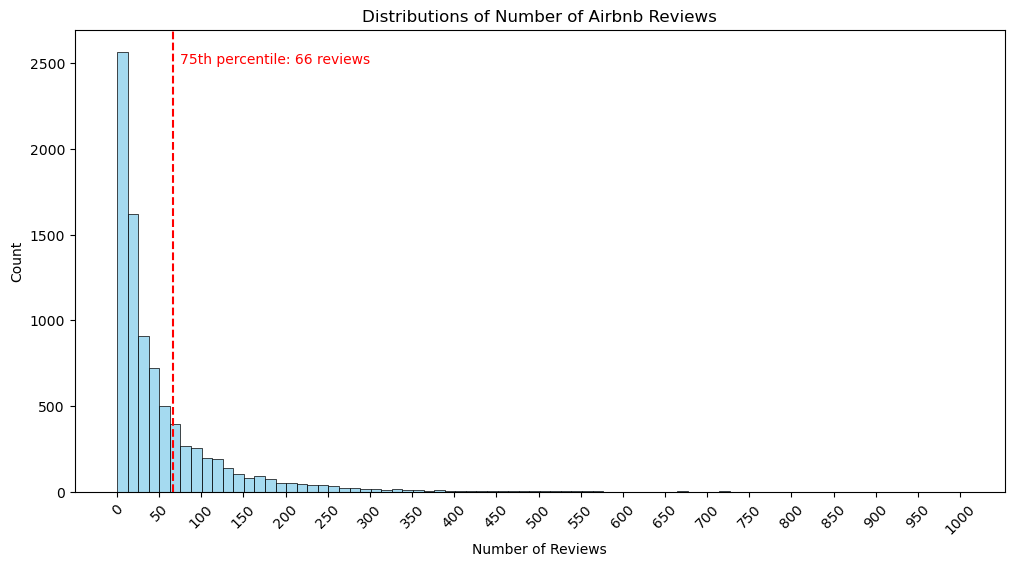

In [5]:
# Look at the distribution of reviews to decide what is considered a high number of reviews. This is as proxy indicator for a popular (or infamous listing)

# calculate the 90th percentile
high_reviews_threshold = int(airbnb_small['reviews'].quantile(0.75))

# initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# plot histogram with the specified bins
sns.histplot(airbnb_small['reviews'], bins = 80, kde = False, ax = ax, color = 'skyblue', edgecolor='black', linewidth=0.5)
ax.set_title('Distributions of Number of Airbnb Reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Reviews')

# Add a line for the 90th percentile
ax.axvline(high_reviews_threshold, color = 'red', linestyle = 'dashed')
ax.text(75, 2500,f'75th percentile: {high_reviews_threshold} reviews', color = 'red')

# set x-ticks
xticks = range(0, airbnb['reviews'].max()+10, 50)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

#show plot
plt.show()

In [6]:
# label listings that have rating and number of reviews at and above their respective 80th percentiles as stellar
airbnb_small['stellar'] = (airbnb_small['reviews'] >= high_reviews_threshold) & (airbnb_small['rating'] >= high_rating_threshold)

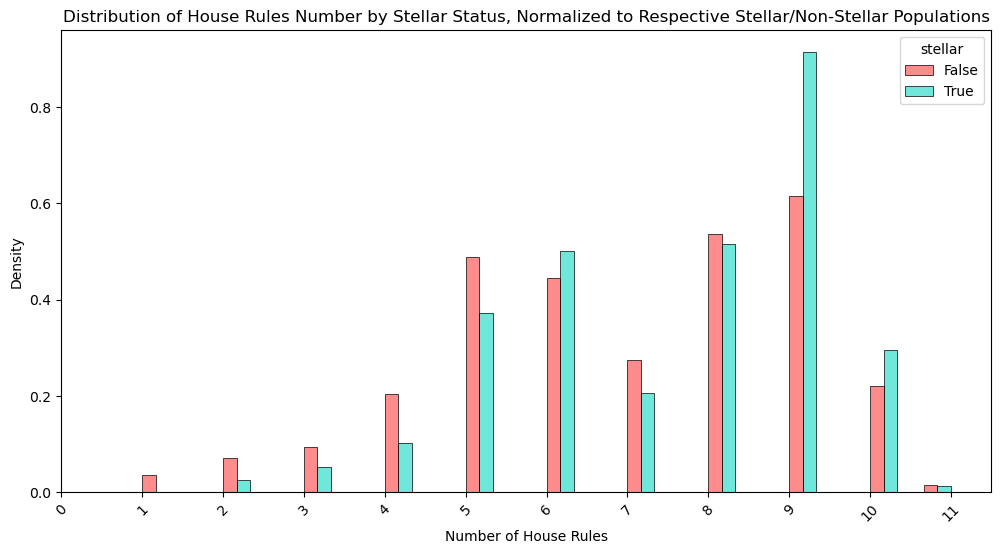

In [7]:
#Study the number of house rules stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.histplot(data=airbnb_small, x='house_rules_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['#ff6666', '#40e0d0'], edgecolor='black', linewidth=0.5,bins=30, stat = 'density',common_norm=False)

# Set titles and labels
ax.set_title('Distribution of House Rules Number by Stellar Status, Normalized to Respective Stellar/Non-Stellar Populations')
ax.set_xlabel('Number of House Rules')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 12, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# Show plot
plt.show()

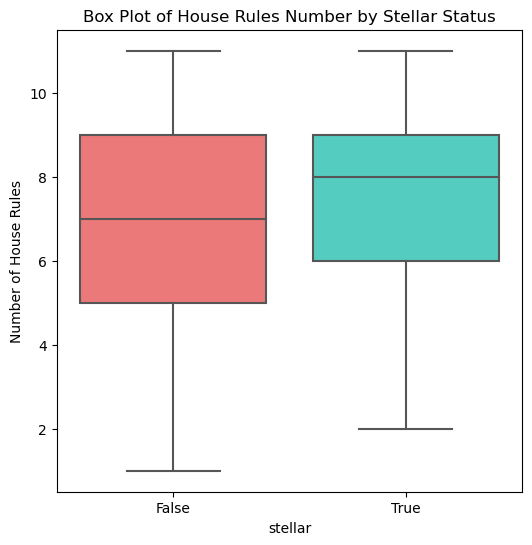

In [8]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.boxplot(data=airbnb_small, y='house_rules_num', x = 'stellar', palette=['#ff6666', '#40e0d0'])

# Set titles and labels
ax.set_title('Box Plot of House Rules Number by Stellar Status')
ax.set_ylabel('Number of House Rules')

# set x-ticks
xticks = range(0, 2, 1)
ax.set_xticks(xticks)

# Show plot
plt.show()

from the density histogram and boxplot, it's clear that the stellar listings tend to have more house rules.

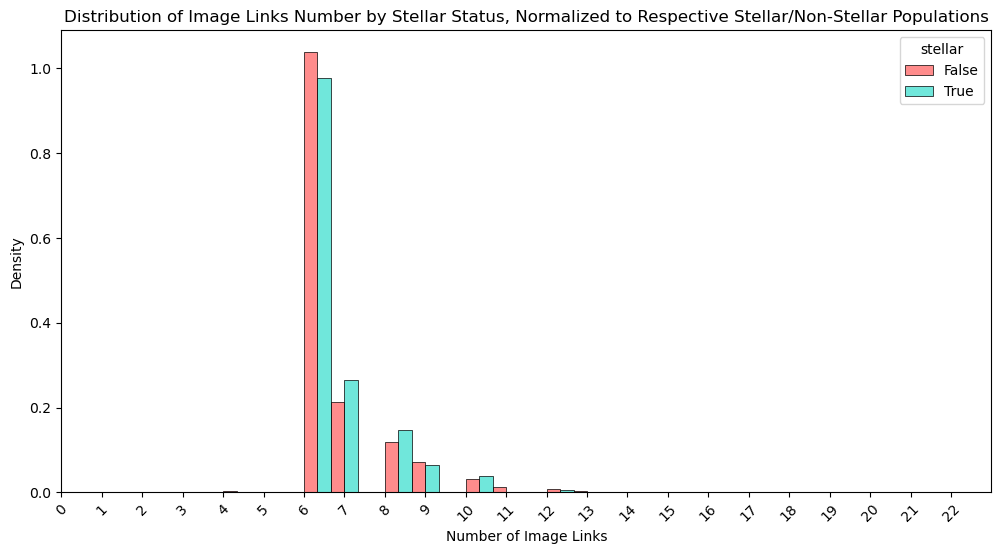

In [9]:
#Study the number of image links stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.histplot(data=airbnb_small, x='img_links_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['#ff6666', '#40e0d0'], edgecolor='black', linewidth=0.5, bins=30, stat = 'density',common_norm=False)

# Set titles and labels
ax.set_title('Distribution of Image Links Number by Stellar Status, Normalized to Respective Stellar/Non-Stellar Populations')
ax.set_xlabel('Number of Image Links')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 23, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# Show plot
plt.show()


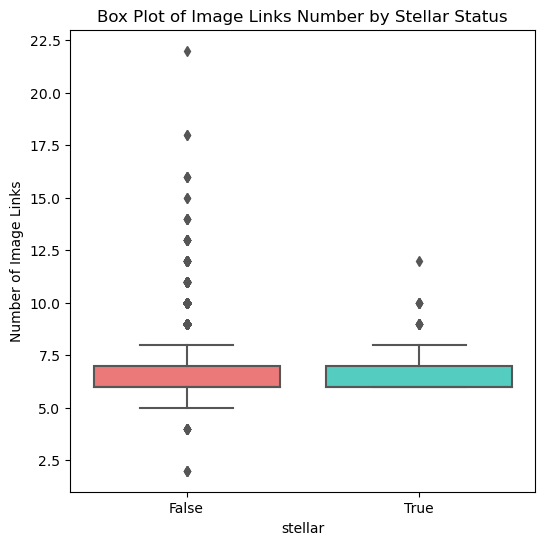

In [10]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.boxplot(data=airbnb_small, y='img_links_num', x = 'stellar', palette=['#ff6666', '#40e0d0'])

# Set titles and labels
ax.set_title('Box Plot of Image Links Number by Stellar Status')
ax.set_ylabel('Number of Image Links')

# set x-ticks
xticks = range(0, 2, 1)
ax.set_xticks(xticks)

# Show plot
plt.show()

The density histogram suggests that stellar listings tend to have more images, but the box plots show these as inconclusive

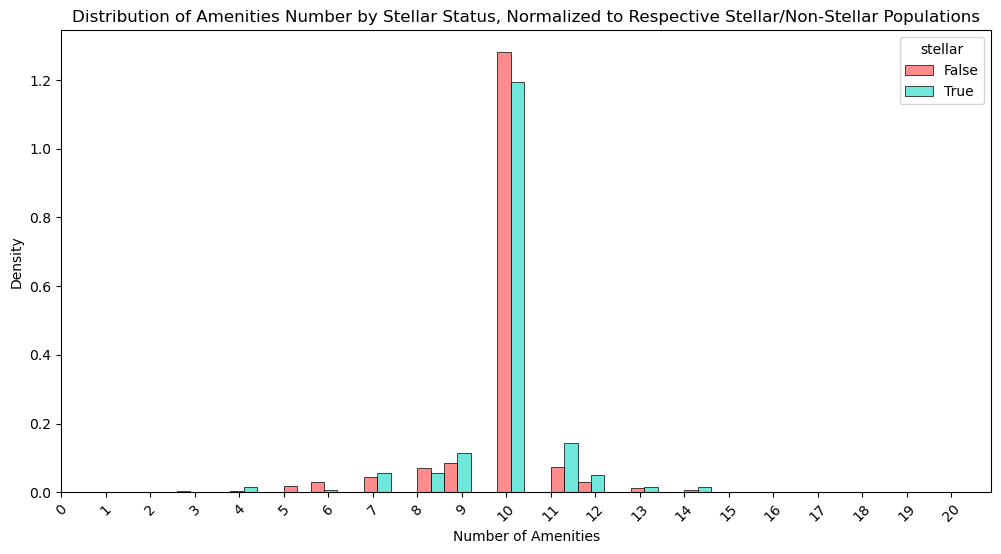

In [11]:
#Study the number of amneties stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.histplot(data=airbnb_small, x='amenities_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['#ff6666', '#40e0d0'], edgecolor='black', linewidth=0.5, bins=30, stat = 'density',common_norm=False)

# Set titles and labels
ax.set_title('Distribution of Amenities Number by Stellar Status, Normalized to Respective Stellar/Non-Stellar Populations')
ax.set_xlabel('Number of Amenities')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 21, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# Show plot
plt.show()

# Both have a right skew, but it is also quite clear that stellar listings seem to have more images!


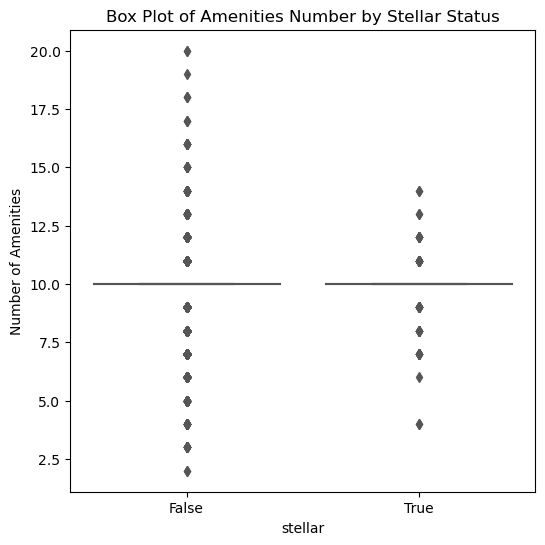

In [12]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.boxplot(data=airbnb_small, y='amenities_num', x = 'stellar', palette=['#ff6666', '#40e0d0'])

# Set titles and labels
ax.set_title('Box Plot of Amenities Number by Stellar Status')
ax.set_ylabel('Number of Amenities')
# ax.set_ylabel('')

# set x-ticks
xticks = range(0, 2, 1)
ax.set_xticks(xticks)

# Show plot
plt.show()

The density histogram suggests that stellar listings tend to have more amenities, but the box plots show these as inconclusive.

In [13]:
airbnb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_id', 'address', 'price',
       'country', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms',
       'studios', 'checkin', 'checkout', 'usd_price', 'tv', 'wifi',
       'chromecast', 'refrigerator', 'kitchen', 'view', 'parking', 'workspace',
       'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events',
       'house_rules_num', 'img_links_num', 'amenities_num'],
      dtype='object')

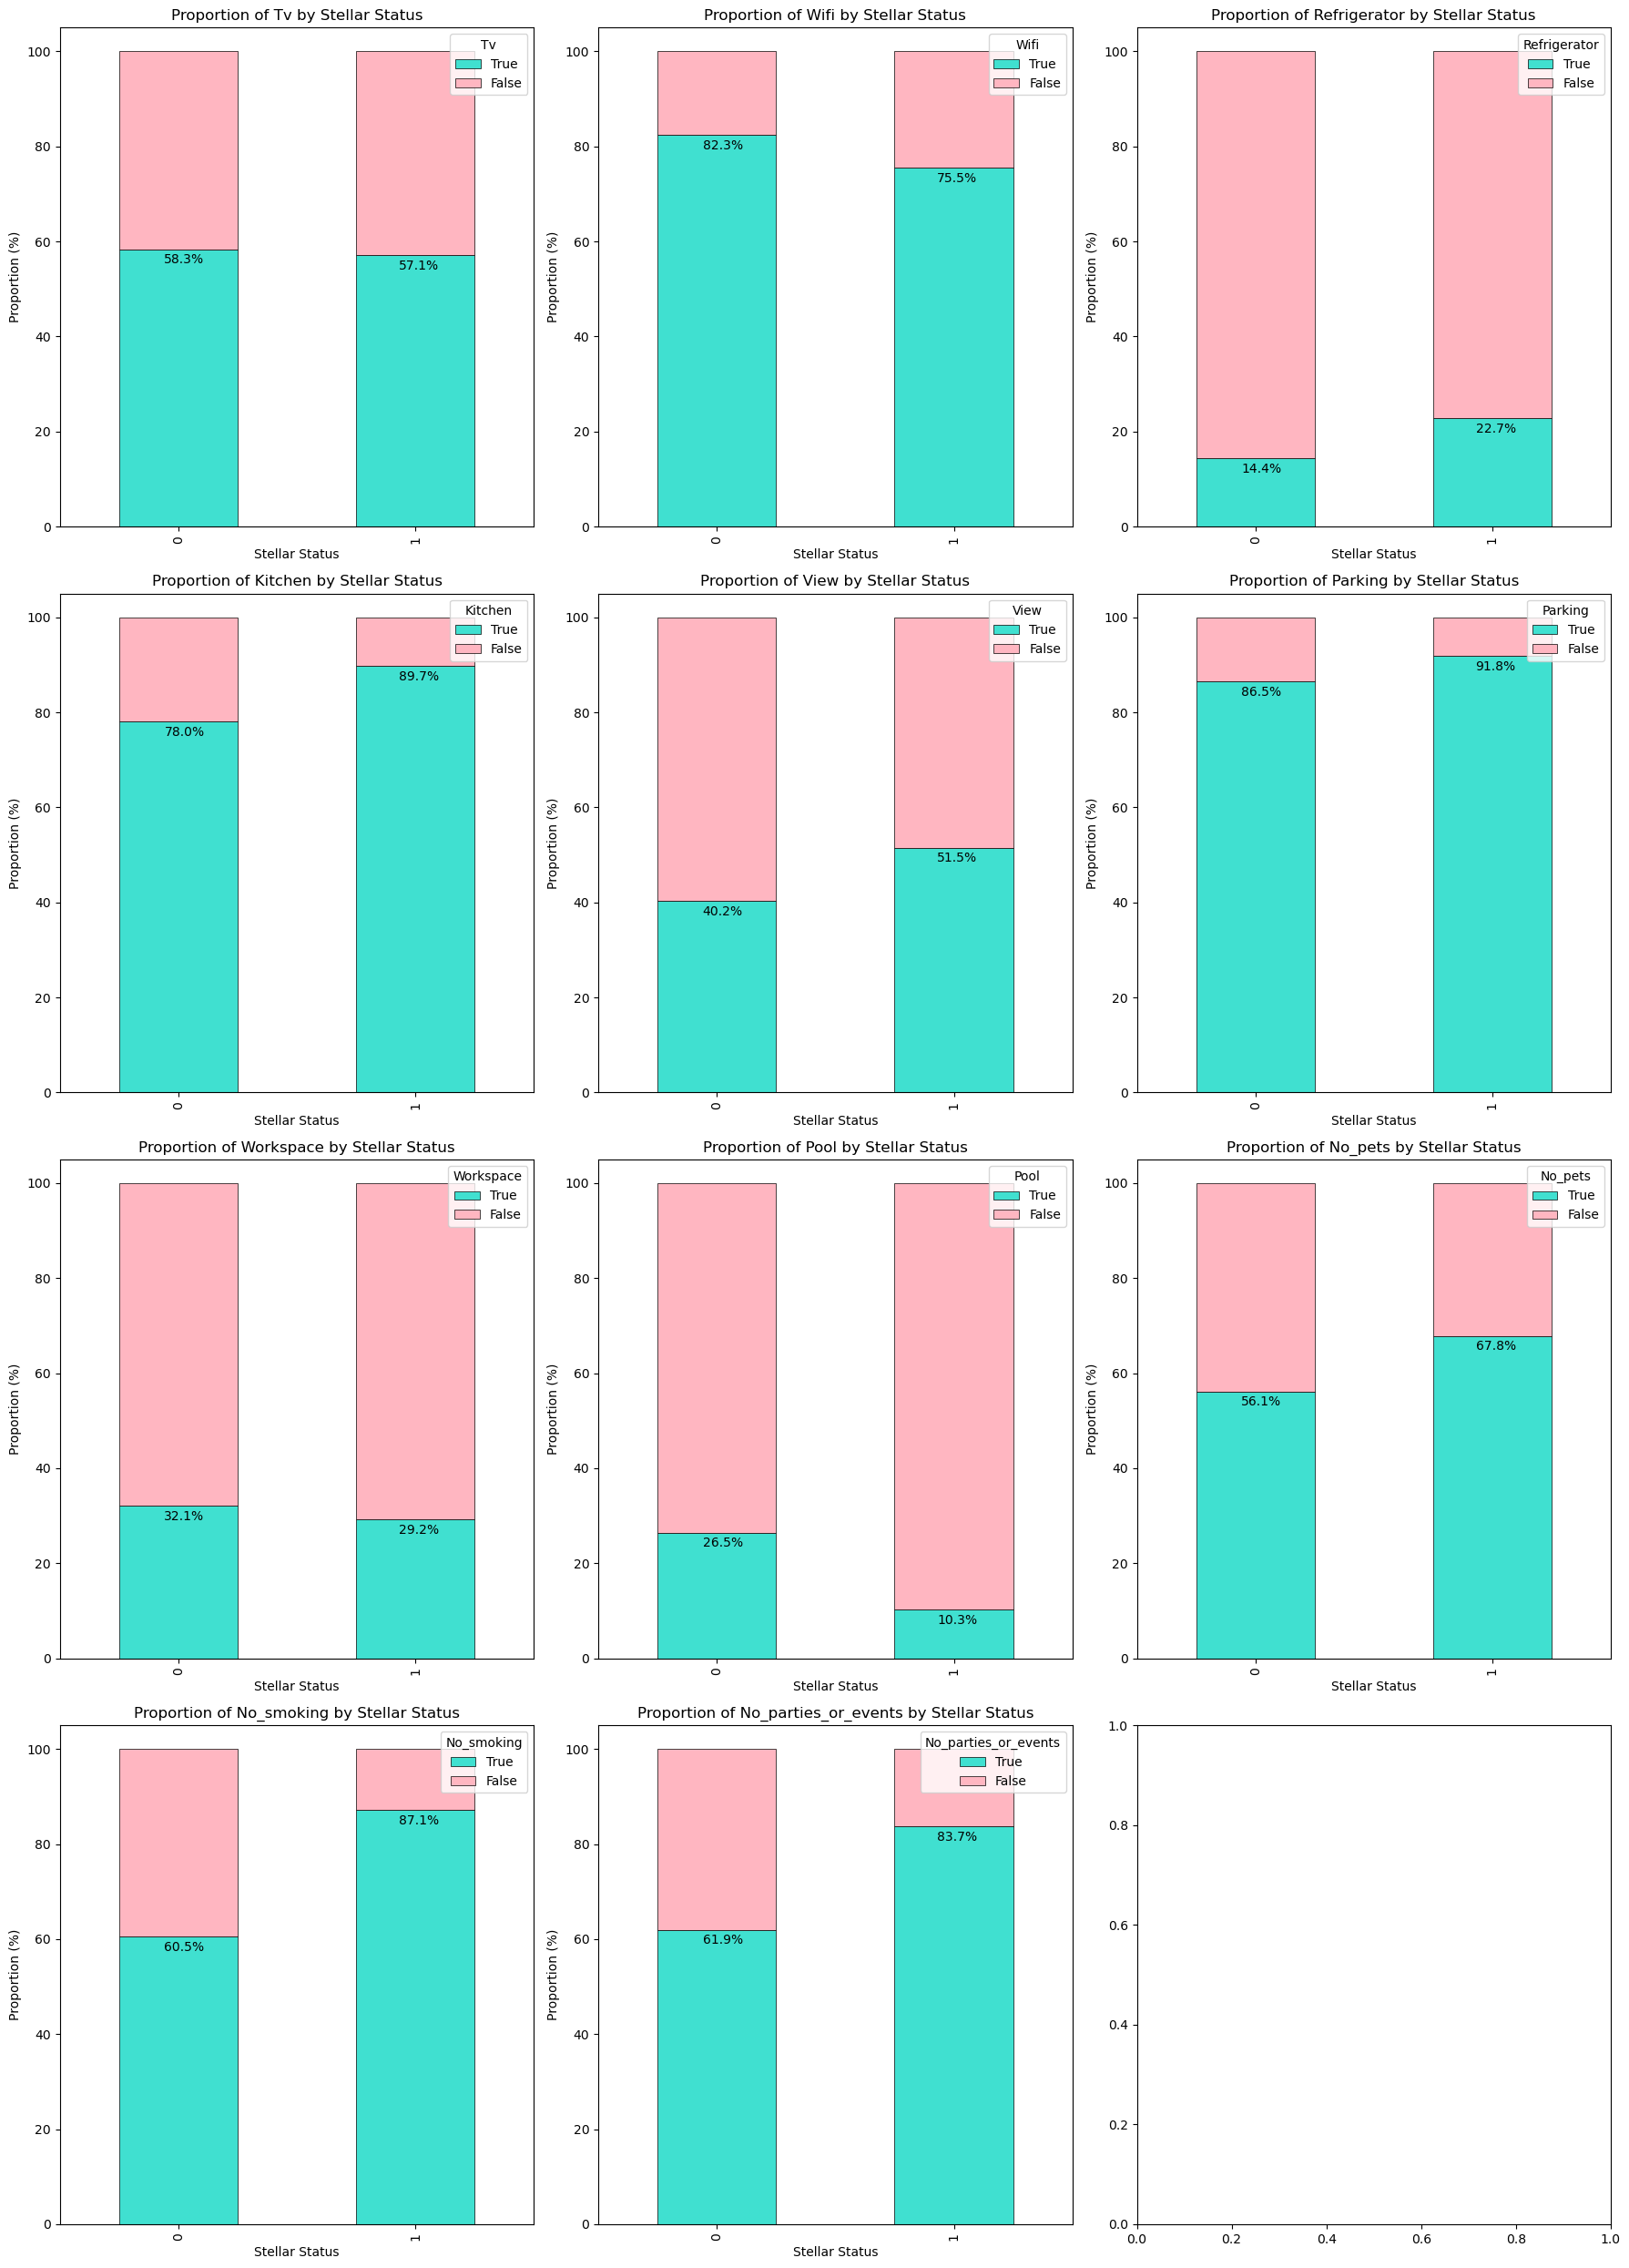

In [14]:
# # List of binary columns
binary_columns = ['tv', 'wifi', 'refrigerator', 'kitchen', 'view', 
                  'parking', 'workspace', 'pool','no_pets', 'no_smoking', 'no_parties_or_events'] # didn't take gym or chromecast as hardly any listings have those

# Initialize a figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 25))
axes = axes.flatten()

# Plot each binary column
for i, column in enumerate(binary_columns):
    # Calculate the proportion of True/False for each group
    prop_df = airbnb_small.groupby(['stellar', column]).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
    
    # Reset the index to make 'stellar' a column again
    prop_df.reset_index(inplace=True)
    
    # Ensure the columns are ordered with True first
    prop_df = prop_df[['stellar', True, False]]
    
    # Plot the stacked bar chart
    prop_df.plot(kind='bar', stacked=True, ax=axes[i], color=['#40e0d0', '#ffb6c1'], edgecolor='black', linewidth=0.5)
    
    axes[i].text(-0.06, prop_df[1][0]-3, f"{prop_df[1][0]:.1f}%")
    axes[i].text(0.93, prop_df[1][1]-3, f"{prop_df[1][1]:.1f}%")
    
    # Set titles and labels
    axes[i].set_title(f'Proportion of {column.capitalize()} by Stellar Status')
    axes[i].set_xlabel('Stellar Status')
    axes[i].set_ylabel('Proportion (%)')
    axes[i].legend(title=column.capitalize(), loc='upper right')

    
# Adjust layout
plt.tight_layout()
plt.show()

# # Stellar listings tend to...
# TV: Not have TVs
# Wifi: Not have Wifi
# Refrigerator: Have a refrigerator
# Kitchen: Have a kitchen
# View: Have a view
# Parking: Have Parking
# Workspace: Not have Workspace
# Pool: Not have a pool

# No smoking rule: Have this rule
# No pets rule: Have this rule
# No parties or events rule: Have this rule

In [15]:
#create stellar column for main airbnb dataframe also
airbnb['stellar'] = (airbnb['reviews'] >= high_reviews_threshold) & (airbnb['rating'] >= high_rating_threshold)

# groupby country and stellar
airbnb_by_country_stellar = airbnb.groupby(['country', 'stellar'])

# find the top 10 countries with the most number of stellar listings
top_10_countries_raw_num = airbnb_by_country_stellar['country'].count().unstack().sort_values(by = True, ascending = False).head(10)
top_10_countries_raw_num = top_10_countries_raw_num.reindex([True,False], axis = 1)
top_10_countries_raw_num

stellar,True,False
country,,
United Kingdom,60.00,252.00
United States,18.00,173.00
Greece,18.00,867.00
France,16.00,450.00
Italy,15.00,1171.00
Poland,8.00,126.00
Norway,8.00,201.00
Japan,7.00,314.00
Iceland,7.00,24.00


In [16]:
top_10_countries_stellar_percentage = airbnb_by_country_stellar['country'].count().unstack().apply(lambda x : x/x.sum() * 100, axis =1).sort_values(by = True, ascending = False)
top_10_countries_stellar_percentage = top_10_countries_stellar_percentage.reindex([True,False], axis = 1)
top_10_countries_stellar_percentage.head(10)

stellar,True,False
country,,
Ireland,33.33,66.67
Costa Rica,25.00,75.00
Peru,25.00,75.00
Iceland,22.58,77.42
United Kingdom,19.23,80.77
Belize,15.38,84.62
Latvia,10.00,90.00
United States,9.42,90.58
Canada,8.11,91.89


In [17]:
# Extract the top 10 countries with the most number of stellar listings
top_10_countries_raw_num_names = set(top_10_countries_raw_num.index.get_level_values('country'))
print(top_10_countries_raw_num_names)

{' Norway', ' United Kingdom', ' Romania', ' Italy', ' France', ' Poland', ' United States', ' Iceland', ' Japan', ' Greece'}


In [18]:
# Extract the top 10 countries with the highest percentage of stellar listings
top_ten_countries_stellar_percentage_names = set(top_10_countries_stellar_percentage.head(10).index.get_level_values('country'))
print(top_ten_countries_stellar_percentage_names)

{' Ireland', ' United Kingdom', ' Latvia', ' Canada', ' Belize', ' Australian', ' Costa Rica', ' United States', ' Iceland', ' Peru'}


In [19]:
countries_best = top_10_countries_raw_num_names.intersection(top_ten_countries_stellar_percentage_names)
countries_best

{' Iceland', ' United Kingdom', ' United States'}

In [20]:
# moving forward, to focus on these three countries that are both in the top ten of raw numbers of stellar listings, and also high percentage of stellar listings

In [21]:
airbnb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_id', 'address', 'price',
       'country', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms',
       'studios', 'checkin', 'checkout', 'usd_price', 'tv', 'wifi',
       'chromecast', 'refrigerator', 'kitchen', 'view', 'parking', 'workspace',
       'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events',
       'house_rules_num', 'img_links_num', 'amenities_num', 'stellar'],
      dtype='object')

In [22]:
# we now filter out the stellar listings in the three countries of interest, Iceland, United Kingdom, United States

airbnb_countries_best_stellar = airbnb_small[(airbnb_small['country'].isin(countries_best)) & (airbnb_small['stellar'] == True)].reset_index(drop = True)
airbnb_countries_best_stellar.head()

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num,stellar
0,12132982,Nónsteinn -2- Enjoy life in the countryside.,4.99,943,20366724,"Grundarfjörður, Iceland",18171.00,Iceland,1,1,2,0,0,0,After 4 00 pm,12 00 pm,132.85,False,True,False,False,True,True,True,False,False,False,False,True,True,5,6,10,True
1,27421255,"Álfasteinn, Destination Paradise ;)",4.99,137,20366724,"Grundarfjörður, Iceland",24531.00,Iceland,1,5,8,0,3,0,4 00 pm - 12 00 am,12 00 pm,179.35,True,True,False,False,True,False,True,False,False,False,False,True,True,9,6,10,True
2,34567424,Björg Hörgárdalur farm stay apt. B,5.00,165,257556789,"Akureyri, Iceland",21084.00,Iceland,1,1,2,0,1,0,After 4 00 pm,11 00 am,154.15,True,True,False,False,True,True,True,False,False,False,True,True,True,9,7,10,True
3,50325030,Sunny Goldstream Cabin - Aurora Viewing & Trails,4.99,67,41963725,"Fairbanks, Alaska, United States",8183.00,United States,0,4,6,1,1,0,4 00 pm - 2 00 am,10 00 am,8183.00,False,True,False,False,True,False,True,True,False,False,False,True,False,8,6,10,True
4,27958452,Small House on a Farm with Beautiful Oceanview...,4.98,271,113863001,"Borgarnes, Iceland",10462.00,Iceland,1,3,4,0,0,0,After 4 00 pm,12 00 pm,76.49,False,True,False,False,True,False,True,False,False,False,False,True,True,9,6,10,True


In [23]:
# !pip install geopy

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="airbnb_project")

# Create new columns for latitude and longitude
airbnb_countries_best_stellar['latitude'] = None
airbnb_countries_best_stellar['longitude'] = None

# Geocode the addresses
for index, row in airbnb_countries_best_stellar.iterrows():
    address = row['address']
    location = geolocator.geocode(address)
    if location:
        airbnb_countries_best_stellar.at[index, 'latitude'] = location.latitude
        airbnb_countries_best_stellar.at[index, 'longitude'] = location.longitude

# Now you can use the latitude and longitude columns to create the map

In [26]:
airbnb_countries_best_stellar[airbnb_countries_best_stellar['latitude'].isna() |airbnb_countries_best_stellar['longitude'].isna()]

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num,stellar,latitude,longitude
13,46700145,"“The Orchard” Beautiful location, amazing views",4.98,114,164165253,"Maidenwells, Wales, United Kingdom",16062.00,United Kingdom,1,4,5,0,2,0,After 3 00 pm,10 00 am,20856.27,True,True,False,True,True,False,True,False,False,False,True,True,True,6,8,10,True,None,None
27,33291869,The Hut in the Wild,4.98,455,235424658,"York, North Yorkshire, United Kingdom",12849.00,United Kingdom,1,1,2,0,0,0,After 4 00 pm,11 00 am,16684.24,False,True,False,False,True,True,True,False,False,False,False,True,True,9,6,10,True,None,None
28,48580084,The cosiest shepherds hut with a bubbling hot tub,4.98,89,216358134,"Spooner Row, UK, United Kingdom",10509.00,United Kingdom,1,1,2,0,1,0,After 3 00 pm,10 00 am,13645.78,True,True,False,False,True,False,True,False,False,False,False,True,True,7,6,10,True,None,None
38,37984680,Peaklets Shepherds Hut in the South Downs,4.99,124,73697576,"West Firle, England, United Kingdom",11087.00,United Kingdom,1,1,2,0,1,0,After 4 00 pm,10 00 am,14396.31,False,True,False,True,True,False,True,False,False,False,False,True,True,6,6,9,True,None,None
68,14013334,"Hekla Comfort House, Modern, Secluded & a Hot tub",5.00,516,83798966,"Hvolsvöllur, South, Iceland",23072.00,Iceland,1,3,6,0,3,0,After 4 00 pm,12 00 pm,168.68,True,True,False,False,True,True,True,False,False,False,True,True,True,8,9,12,True,None,None


In [27]:
# Remove rows with None values in latitude or longitude
airbnb_countries_best_stellar = airbnb_countries_best_stellar.dropna(subset=['latitude', 'longitude'])

In [32]:
# generate maps to see if the listings are concentrated in certain areas, so we can focus on developing those areas

# use !pip install folium if need be
import folium
from folium.plugins import MarkerCluster

# Filter USA stellar listings
usa_stellar_listings = airbnb_countries_best_stellar[airbnb_countries_best_stellar['country'] == ' United States']

# Calculate the center of the map
center_lat = usa_stellar_listings['latitude'].mean()
center_lon = usa_stellar_listings['longitude'].mean()

# Create a map
m_usa = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m_usa)


# Add markers to the cluster
for index, row in usa_stellar_listings.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=row['name']).add_to(marker_cluster)

# Display the map
m_usa

In [35]:
# Filter Ireland stellar listings
iceland_stellar_listings = airbnb_countries_best_stellar[airbnb_countries_best_stellar['country'] == ' Iceland']

# Calculate the center of the map
center_lat = iceland_stellar_listings['latitude'].mean()
center_lon = iceland_stellar_listings['longitude'].mean()

# Create a map
m_iceland = folium.Map(location=[center_lat, center_lon], zoom_start=6)


# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m_iceland)

# Add markers to the cluster
for index, row in iceland_stellar_listings.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=row['name']).add_to(marker_cluster)

# Display the map
m_iceland

In [36]:
# Filter UK stellar listings
uk_stellar_listings = airbnb_countries_best_stellar[airbnb_countries_best_stellar['country'] == ' United Kingdom']

# Calculate the center of the map
center_lat = uk_stellar_listings['latitude'].mean()
center_lon = uk_stellar_listings['longitude'].mean()

# Create a map
m_uk = folium.Map(location=[center_lat, center_lon], zoom_start=6)


# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m_uk)

# Add markers to the cluster
for index, row in uk_stellar_listings.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=row['name']).add_to(marker_cluster)

# Display the map
m_uk